In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

TypeError: only size-1 arrays can be converted to Python scalars

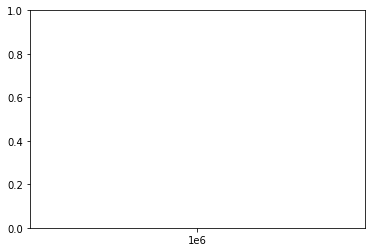

In [2]:
dir1 = '../data/ppo/e_w_1e6_pulse_punish_demo/recorder/'
dir2 = '../data/ppo/e_w_2e6_pulse_punish_demo/recorder/'

def count_emit(data_dir):
    emits = []
    for filename in os.listdir(data_dir):
        if filename[-4:] != 'json':
            break
        with open(data_dir+filename, 'r') as f:
            data = json.load(f)
            if data['step num'] > 150:
                emits.append(sum(data['emit']))
    emits = np.array(emits)
    return np.mean(emits), np.std(emits), 

c1 = count_emit(dir1)
c2 = count_emit(dir2)
plt.bar(['1e6', '2e6'], [c1, c2])

In [81]:
pm = np.load('../data/policy_map/20200202T235500.npy')

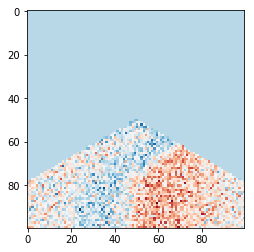

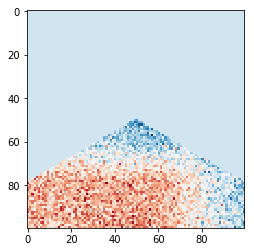

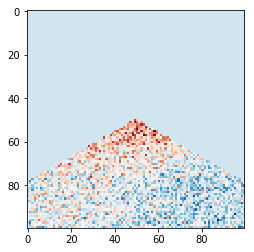

In [82]:
for i in range(3):
    plt.imshow(pm[:, :, i], cmap='RdBu')
    plt.show()

In [83]:
import seaborn as sns

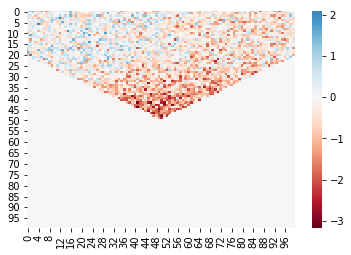

In [89]:
sns.heatmap(pm[::-1, ::-1, 2], center=0, cmap='RdBu')

In [65]:
pm_pp = np.where(pm[..., 2]<0, 0.3, pm[..., 2])
pm_pp = np.where(pm_pp>=1, 0.8, pm_pp[..., 2])

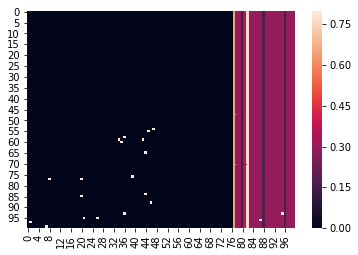

In [66]:
sns.heatmap(pm_pp)